<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/Face_Maskdetection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import numpy as np
import tensorflow
import pandas as pd

import matplotlib.pyplot as plt

import os

from itertools import cycle

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, AveragePooling2D, Flatten ,Dense, Input

from sklearn.metrics import classification_report, confusion_matrix

import cv2

In [ ]:
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import label_binarize

from scipy import interp

from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/project_folder

[Errno 2] No such file or directory: 'gdrive/My Drive/project_folder'
/content


In [ ]:
! git clone https://github.com/prajnasb/observations.git


Cloning into 'observations'...
remote: Enumerating objects: 1638, done.
remote: Total 1638 (delta 0), reused 0 (delta 0), pack-reused 1638
Receiving objects: 100% (1638/1638), 75.94 MiB | 21.70 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
# List all the images with a mask from the master directory.
filenames = os.listdir("/content/observations/experiements/data/with_mask/")

np.random.shuffle(filenames)

print(filenames) # Read all the images from that directory and resize them into 224x224 pixels.

with_mask_data = [cv2.resize(cv2.imread("/content/observations/experiements/data/with_mask/"+img), (224,224)) for img in filenames]

print(len(with_mask_data))

['augmented_image_190.jpg', 'augmented_image_247.jpg', '297-with-mask.jpg', '466-with-mask.jpg', 'augmented_image_125.jpg', 'augmented_image_179.jpg', '257-with-mask.jpg', 'augmented_image_270.jpg', 'augmented_image_10.jpg', '414-with-mask.jpg', 'augmented_image_124.jpg', 'augmented_image_200.jpg', '475-with-mask.jpg', '311-with-mask.jpg', '351-with-mask.jpg', 'augmented_image_186.jpg', '289-with-mask.jpg', '192-with-mask.jpg', '197-with-mask.jpg', 'augmented_image_65.jpg', '402-with-mask.jpg', 'augmented_image_246.jpg', 'augmented_image_183.jpg', 'augmented_image_277.jpg', 'augmented_image_182.jpg', '150-with-mask.jpg', 'augmented_image_147.jpg', '194-with-mask.jpg', 'augmented_image_261.jpg', 'augmented_image_138.jpg', '182-with-mask.jpg', '431-with-mask.jpg', 'augmented_image_78.jpg', '413-with-mask.jpg', '349-with-mask.jpg', '129-with-mask.jpg', 'augmented_image_316.jpg', 'augmented_image_209.jpg', '407-with-mask.jpg', '39-with-mask.jpg', '424-with-mask.jpg', 'augmented_image_242.j

In [ ]:
# List all the images  that don’t contain a mask.
filenames = os.listdir("/content/observations/experiements/data/without_mask")

np.random.shuffle(filenames)

print(filenames)

without_mask_data = [cv2.resize(cv2.imread("/content/observations/experiements/data/without_mask/"+img), (224,224)) for img in filenames]

print(len(without_mask_data))

['augmented_image_215.jpg', '232.jpg', '372.jpg', '112.jpg', 'augmented_image_128.jpg', '414.jpg', '70.jpg', '79.jpg', '367.jpg', '386.jpg', '251.jpg', '315.jpg', '354.jpg', '14.jpg', '64.jpg', '419.jpg', 'augmented_image_61.jpg', 'augmented_image_181.jpg', 'augmented_image_36.jpg', '299.jpg', 'augmented_image_79.jpg', 'augmented_image_209.jpg', '115.jpg', '97.jpg', '319.jpg', '214.jpg', '311.jpg', '261.jpg', 'augmented_image_107.jpg', '158.jpg', '397.jpg', 'augmented_image_127.jpg', '57.jpg', '331.jpg', 'augmented_image_103.jpg', '133.jpg', '222.jpg', 'augmented_image_316.jpg', 'augmented_image_71.jpg', 'augmented_image_136.jpg', '123.jpg', '174.jpg', '36.jpg', '410.jpg', 'augmented_image_204.jpg', '131.jpg', '445.jpg', '359.jpg', 'augmented_image_133.jpg', 'augmented_image_59.jpg', 'augmented_image_121.jpg', 'augmented_image_294.jpg', '81.jpg', '336.jpg', '3.jpg', '330.jpg', 'augmented_image_317.jpg', '407.jpg', '92.jpg', 'augmented_image_243.jpg', '184.jpg', '129.jpg', '428.jpg', '2

In [ ]:
# combined both arrays to make a single array, converting each pixel value between 0 and 1 by dividing them by 255.

data = np.array(with_mask_data + without_mask_data).astype('float32')/255 # Label of the image with a mask - 0 # Label of the image without mask - 1

labels = np.array([0]*len(with_mask_data) + [1]*len(without_mask_data))

print(data.shape) # Splitting the data into training and testing sets.

(training_data, testing_data, training_label, testing_label) = train_test_split(data, labels, test_size=0.50, stratify=labels, random_state=42)
print(training_data.shape) # Function to Plot the Accuracy/Loss Curves

(1376, 224, 224, 3)
(688, 224, 224, 3)


In [ ]:
def plot_acc_loss(result, epochs):
  acc = result.history['accuracy']
  loss = result.history['loss']
  val_acc = result.history['val_accuracy']
  val_loss = result.history['val_loss']
  plt.figure(figsize=(15, 5))
  plt.subplot(121)
  plt.plot(range(1,epochs), acc[1:], label='Train_acc')
  plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
  plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.subplot(122)
  plt.plot(range(1,epochs), loss[1:], label='Train_loss')
  plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
  plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
#building Convolution Neural Network
# Image data generator to generate more images.

generator = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
horizontal_flip=True,fill_mode="nearest")
# Setting the hyperparameters.

epoch = 5
batch_size = 32

In [ ]:
# Training the mobile net v2 architecture.
transfer_learning_model = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
model_main = transfer_learning_model.output
model_main = AveragePooling2D(pool_size=(7, 7))(model_main) # Applying the flattening layer.
model_main = Flatten(name="flatten")(model_main)
model_main = Dense(128, activation="relu", name="dense_layer")(model_main)
model_main = Dropout(0.5)(model_main)
model_main = Dense(2, activation="softmax")(model_main)
cnn = Model(inputs=transfer_learning_model.input, outputs=model_main)
for row in transfer_learning_model.layers:
  row.trainable = False

In [ ]:
#using Adam optimizer

#optimizer = Adam(lr=learning_rate, decay=learning_rate / epoch)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate = 0.0001),
metrics=["accuracy"])

In [ ]:
#Train the CNN model
history = cnn.fit(generator.flow(training_data, training_label, batch_size=batch_size),steps_per_epoch=len(training_data) // batch_size,
validation_data=(testing_data, testing_label),validation_steps=len(testing_data) // batch_size,epochs=epoch)

Epoch 1/5
21/21 [==============================] - 83s 4s/step - loss: 0.6208 - accuracy: 0.7134 - val_loss: 0.2110 - val_accuracy: 0.9448
Epoch 2/5
21/21 [==============================] - 80s 4s/step - loss: 0.2340 - accuracy: 0.9146 - val_loss: 0.0965 - val_accuracy: 0.9855
Epoch 3/5
21/21 [==============================] - 76s 4s/step - loss: 0.1354 - accuracy: 0.9512 - val_loss: 0.0683 - val_accuracy: 0.9869
Epoch 4/5
21/21 [==============================] - 78s 4s/step - loss: 0.1081 - accuracy: 0.9604 - val_loss: 0.0566 - val_accuracy: 0.9869
Epoch 5/5
21/21 [==============================] - 79s 4s/step - loss: 0.0782 - accuracy: 0.9787 - val_loss: 0.0513 - val_accuracy: 0.9884


22/22 [==============================] - 27s 1s/step - loss: 0.0513 - accuracy: 0.9884


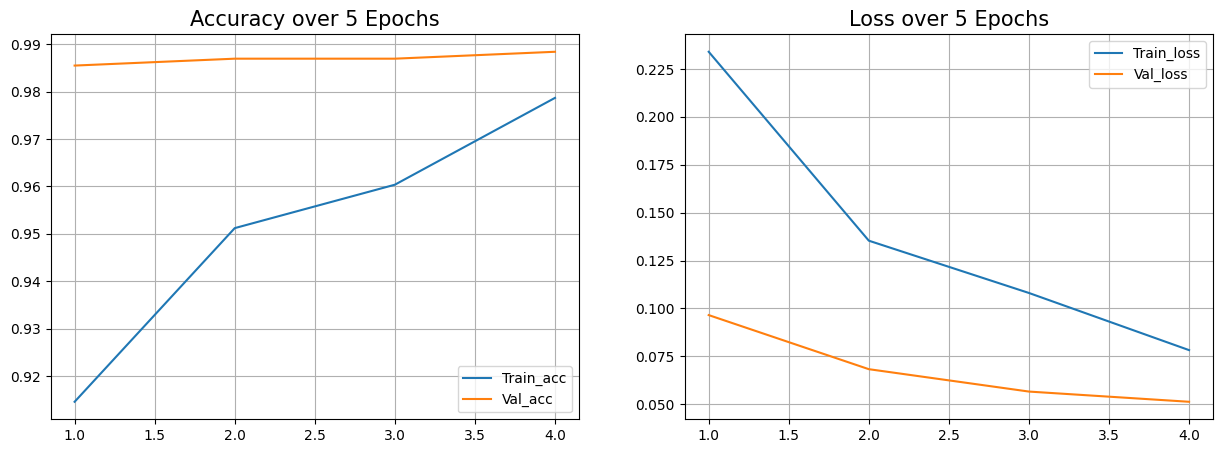

In [ ]:
# Evaluate the model on the test set.

cnn.evaluate(testing_data, testing_label)
plot_acc_loss(history, 5)


In [ ]:

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base = MobileNetV2(input_shape = (128,128,3),include_top = False)

In [ ]:
x = base.output
x = Flatten()(x)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(1,activation='sigmoid')(x)

In [ ]:
model = Model(base.input,x)

In [ ]:
model.compile('adam','binary_crossentropy',['accuracy'])

In [ ]:
imgs = []
lbls = []

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
for i in glob('/content/observations/experiements/data/with_mask/*'):
  img = load_img(i,target_size = (128,128,3))
  img = img_to_array(img)
  imgs.append(img)
  lbls.append(1)
for i in glob('/content/observations/experiements/data/without_mask/*'):
  img = load_img(i,target_size = (128,128,3))
  img = img_to_array(img)
  imgs.append(img)
  lbls.append(0)

In [ ]:
from sklearn.model_selection import train_test_split
imgs = np.array(imgs)
lbls = np.array(lbls)
trainx,testx,trainy,testy = train_test_split(imgs,lbls,stratify = lbls)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('chk',save_best_only=True)

In [ ]:

hist = model.fit(trainx,trainy,validation_data=(testx,testy),epochs = 3,batch_size = 128,callbacks=[mc])

Epoch 1/3
9/9 [==============================] - ETA: 0s - loss: 0.9340 - accuracy: 0.8391 

9/9 [==============================] - 126s 12s/step - loss: 0.9340 - accuracy: 0.8391 - val_loss: 12.5292 - val_accuracy: 0.6890
Epoch 2/3
9/9 [==============================] - 85s 9s/step - loss: 0.0266 - accuracy: 0.9893 - val_loss: 176.5462 - val_accuracy: 0.5029
Epoch 3/3
9/9 [==============================] - 82s 9s/step - loss: 0.0527 - accuracy: 0.9874 - val_loss: 181.7310 - val_accuracy: 0.5029


In [ ]:
#clf = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
clf = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

1/1 [==============================] - 0s 43ms/step


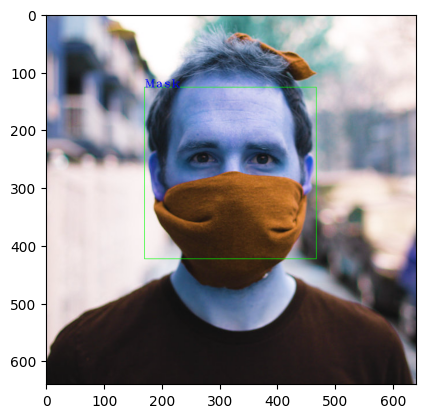

In [ ]:
img = cv2.imread('/content/maskimg.jpg')
boxes = clf.detectMultiScale(img,1.01,5)
for box in boxes:
  (x,y,w,h) = box
  im = img[y:y+h,x:x+w]
  im = cv2.resize(im,(128,128))
  pred = cnn.predict(np.array([im]))
  if pred.round()==0:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    cv2.putText(img,'No Mask',(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1)
  else:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    cv2.putText(img,'Mask',(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1)